In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
from datetime import datetime

In [2]:
con=sqlite3.connect('final_db.sqlite')
cursor = con.cursor()

In [4]:
df = pd.read_pickle('df.pkl')
players = pd.read_pickle('players.pkl')
df_teams = pd.read_pickle('df_teams.pkl')

In [35]:
df.columns

Index(['Equipe domicile', 'Equipe exterieure', 'Vainqueur', 'Score domicile',
       'Score extérieur', 'Buteurs', 'Lieu du match', 'Journée', 'Région',
       'Temperature moyenne', 'Précipitations en mm', 'Date'],
      dtype='object')

In [11]:
df_viz = pd.read_sql("""SELECT * FROM matchs""", con)

,id,date,place,rainfall,temperature,championship_id,created_at,updated_at
0,1,2020-08-21,Bordeaux,5.0,22.5,1,2021-07-15 06:18:56,2021-07-15 06:18:56
1,2,2020-08-22,Dijon,19.0,22.0,1,2021-07-15 06:18:56,2021-07-15 06:18:56
2,3,2020-08-22,Lille,1.0,19.0,1,2021-07-15 06:18:56,2021-07-15 06:18:56
3,4,2020-08-23,Monaco,1.0,25.5,1,2021-07-15 06:18:56,2021-07-15 06:18:56
4,5,2020-08-23,Lorient,1.0,17.0,1,2021-07-15 06:18:56,2021-07-15 06:18:56
...,...,...,...,...,...,...,...,...
375,376,2021-05-23,Rennes,2.0,10.0,1,2021-07-15 06:18:56,2021-07-15 06:18:56
376,377,2021-05-23,Nantes,1.0,12.0,1,2021-07-15 06:18:56,2021-07-15 06:18:56
377,378,2021-05-23,Saint-Étienne,0.0,12.0,1,2021-07-15 06:18:56,2021-07-15 06:18:56
378,379,2021-05-23,Reims,1.0,10.5,1,2021-07-15 06:18:56,2021-07-15 06:18:56


In [20]:
df_goals_players = pd.read_sql("""SELECT players.name, matchs.temperature, matchs.rainfall, matchs.date, matchs.place
                            FROM matchs
                            JOIN goals
                            ON goals.match_id = matchs.id
                            JOIN players
                            ON players.id = goals.player_id""",con)

In [23]:
## On doit avoir les dates, les buts par date, l'équipe correspondante et la météo
## 

In [25]:
# df_goals_per_match = pd.read_sql("""SELECT * FROM match_teams
#                                 """,con)

In [36]:
df_test=df[['Equipe domicile','Equipe exterieure', 'Score domicile', 'Score extérieur', 'Date', 'Temperature moyenne','Précipitations en mm']]

In [40]:
df_test['Score domicile'] = df_test['Score domicile'].astype(int)

In [43]:
df_test['Score extérieur'] = df_test['Score extérieur'].astype(int)

In [45]:
df_test['Date'] = df_test['Date'].astype('datetime64[ns]')

In [46]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Equipe domicile       380 non-null    object        
 1   Equipe exterieure     380 non-null    object        
 2   Score domicile        380 non-null    int64         
 3   Score extérieur       380 non-null    int64         
 4   Date                  380 non-null    datetime64[ns]
 5   Temperature moyenne   380 non-null    float64       
 6   Précipitations en mm  380 non-null    float32       
dtypes: datetime64[ns](1), float32(1), float64(1), int64(2), object(2)
memory usage: 19.4+ KB


<AxesSubplot:xlabel='Temperature moyenne', ylabel='Score domicile'>

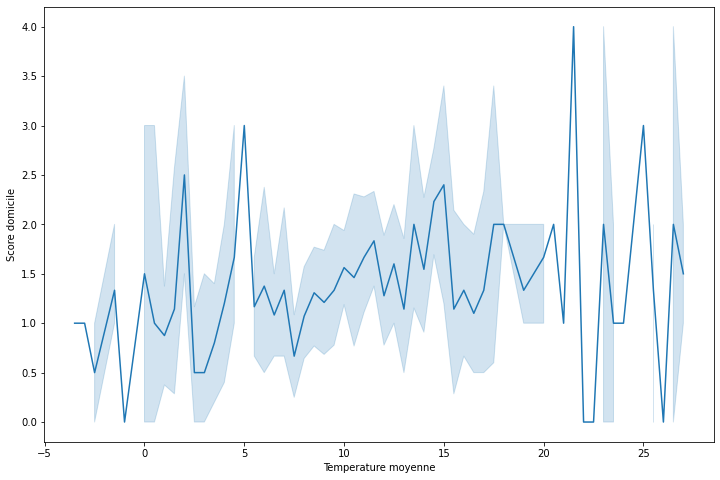

In [69]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df_test, x='Temperature moyenne', y='Score domicile')

<AxesSubplot:xlabel='Temperature moyenne', ylabel='Score extérieur'>

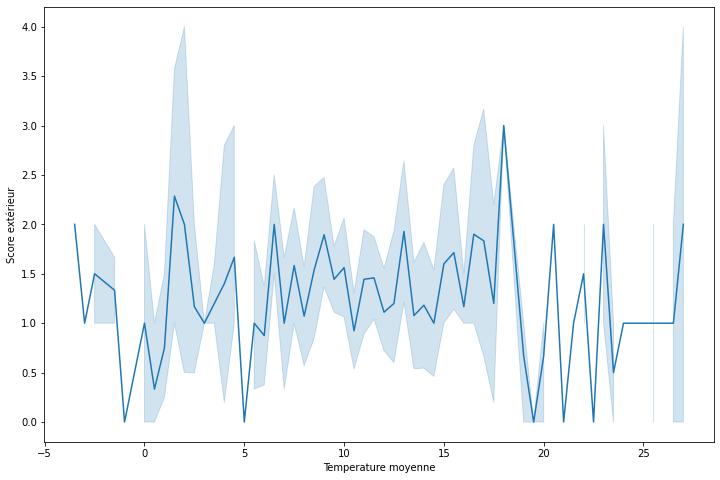

In [72]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df_test, x='Temperature moyenne', y='Score extérieur')

In [79]:
id_and_goals_df = pd.read_sql("""SELECT match_id, goal FROM match_teams
                WHERE team_id = 1
                """,con)

,match_id,goal
0,3,1
1,24,1
2,41,2
3,70,4
4,89,1
5,109,4
6,124,2
7,139,2
8,160,0
9,177,1


In [170]:
df_id = []
for i in id_and_goals_df['match_id']:
    df_id.append(i-1)

In [189]:
a = df_viz.loc[df_id]

In [198]:
b=[]
for i in id_and_goals_df['goal']:
    b.append(i)

In [199]:
len(b)

38

In [200]:
a['goal'] = b

In [204]:
a['date'] = a['date'].astype('datetime64[ns]')

In [216]:
a

,id,date,place,rainfall,temperature,championship_id,created_at,updated_at,goal
2,3,2020-08-22,Lille,1.0,19.0,1,2021-07-15 06:18:56,2021-07-15 06:18:56,1
23,24,2020-09-13,Lille,0.0,20.0,1,2021-07-15 06:18:56,2021-07-15 06:18:56,1
40,41,2020-09-25,Lille,8.0,10.5,1,2021-07-15 06:18:56,2021-07-15 06:18:56,2
69,70,2020-10-18,Lille,2.0,11.5,1,2021-07-15 06:18:56,2021-07-15 06:18:56,4
88,89,2020-11-01,Lille,1.0,14.5,1,2021-07-15 06:18:56,2021-07-15 06:18:56,1
108,109,2020-11-22,Lille,4.0,10.5,1,2021-07-15 06:18:56,2021-07-15 06:18:56,4
123,124,2020-12-06,Lille,0.0,3.5,1,2021-07-15 06:18:56,2021-07-15 06:18:56,2
138,139,2020-12-13,Lille,1.0,5.5,1,2021-07-15 06:18:56,2021-07-15 06:18:56,2
159,160,2020-12-20,Lille,0.0,8.0,1,2021-07-15 06:18:56,2021-07-15 06:18:56,0
176,177,2021-01-06,Lille,2.0,2.0,1,2021-07-15 06:18:56,2021-07-15 06:18:56,1


<AxesSubplot:xlabel='temperature', ylabel='goal'>

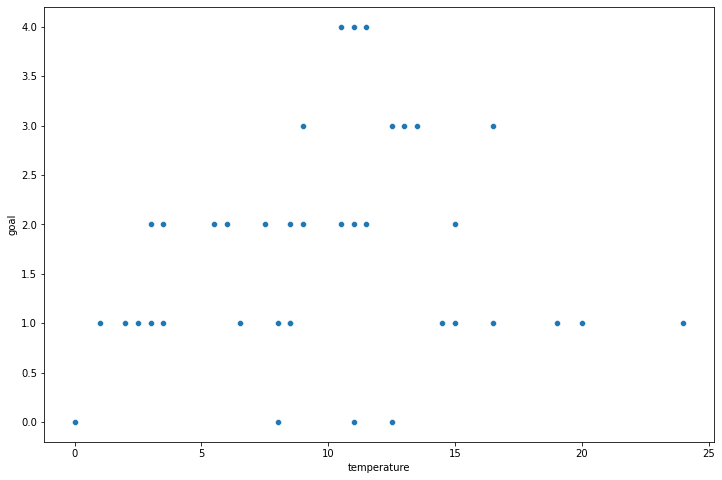

In [221]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=a, x='temperature', y='goal')